In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [77]:
Housing_df = pd.read_csv('Housing.csv')
Housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [78]:
Housing_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [79]:
df = Housing_df.loc[:,['price','area']]
df.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [80]:
list(df.columns)

['price', 'area']

In [81]:
df_train,df_test = train_test_split(df,train_size = 0.7, random_state = 10)
print(len(df_train),len(df_test))
scale = MinMaxScaler()
col = list(df_train.columns)
df_train[col] = scale.fit_transform(df_train[col])
df_test[col] = scale.transform(df_test[col])

381 164


In [82]:
df_train.head()

,price,area
175,0.303030,0.582734
25,0.587879,0.348201
253,0.239394,0.130935
257,0.236364,0.471223
431,0.133333,0.106475


In [83]:
df_test.head()

,price,area
482,0.103030,0.104317
314,0.203030,0.168345
383,0.157576,0.201439
487,0.096970,0.266187
43,0.515152,0.309353


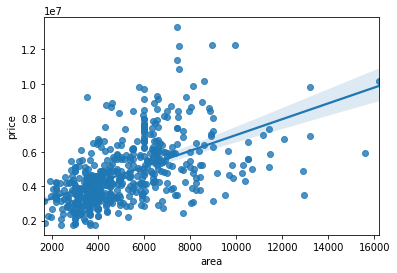

In [84]:
sns.regplot(df.area, df.price)
plt.show()

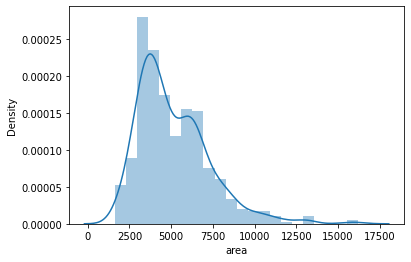

In [85]:
sns.distplot(df.area)
plt.show()

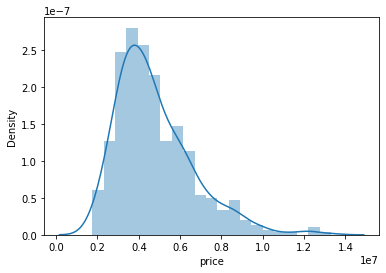

In [86]:
 sns.distplot(df.price)
plt.show()

In [87]:
X_train = df_train['area'].values.reshape(-1,1)
y_train = df_train['price']

X_test = df_test['area'].values.reshape(-1,1)
y_test = df_test['price']

In [88]:
degrees =[1, 2, 3, 6, 10, 20]

y_train_pred = np.zeros((len(df_train),len(degrees)))
y_test_pred = np.zeros((len(df_test), len(degrees)))

for i, degree in enumerate(degrees):
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  model.fit(X_train,y_train)

  y_train_pred[:,i]=model.predict(X_train)
  y_test_pred[:,i]=model.predict(X_test)


In [89]:
y_train_pred

array([[0.47418668, 0.43875135, 0.43958014, 0.37283895, 0.35360483,
        0.39617919],
       [0.32965085, 0.36022771, 0.36020318, 0.38693157, 0.39702723,
        0.38799492],
       [0.19575571, 0.18472264, 0.18464659, 0.16859314, 0.16660568,
        0.15484367],
       ...,
       [0.12109364, 0.04393656, 0.04505784, 0.11581114, 0.08645543,
        0.04268775],
       [0.7313363 , 0.2937324 , 0.28889587, 0.35545707, 0.36292343,
        0.36456343],
       [0.16738057, 0.13483757, 0.13507759, 0.13787842, 0.13425014,
        0.14436483]])

In [90]:
y_test_pred

array([[ 1.79351332e-01,  1.56424129e-01,  1.56511935e-01,
         1.49066164e-01,  1.42530607e-01,  1.51960719e-01],
       [ 2.18810499e-01,  2.21985918e-01,  2.21759197e-01,
         2.03260056e-01,  2.08066026e-01,  2.15726692e-01],
       [ 2.39205125e-01,  2.52506989e-01,  2.52215681e-01,
         2.38963896e-01,  2.40910090e-01,  2.52367956e-01],
       [ 2.79107653e-01,  3.05590066e-01,  3.05325453e-01,
         3.12457483e-01,  3.01563313e-01,  2.90597030e-01],
       [ 3.05709338e-01,  3.36102266e-01,  3.35942345e-01,
         3.56121543e-01,  3.51544041e-01,  3.59124002e-01],
       [ 3.37187999e-01,  3.67168760e-01,  3.67192635e-01,
         3.94534463e-01,  4.08983951e-01,  3.97577095e-01],
       [ 3.81080780e-01,  4.01367743e-01,  4.01700010e-01,
         4.16608188e-01,  4.28062170e-01,  4.51796808e-01],
       [ 1.99302596e-01,  1.90646182e-01,  1.90541127e-01,
         1.73418123e-01,  1.72865826e-01,  1.60213173e-01],
       [ 1.63833683e-01,  1.28289838e-01,  1.285

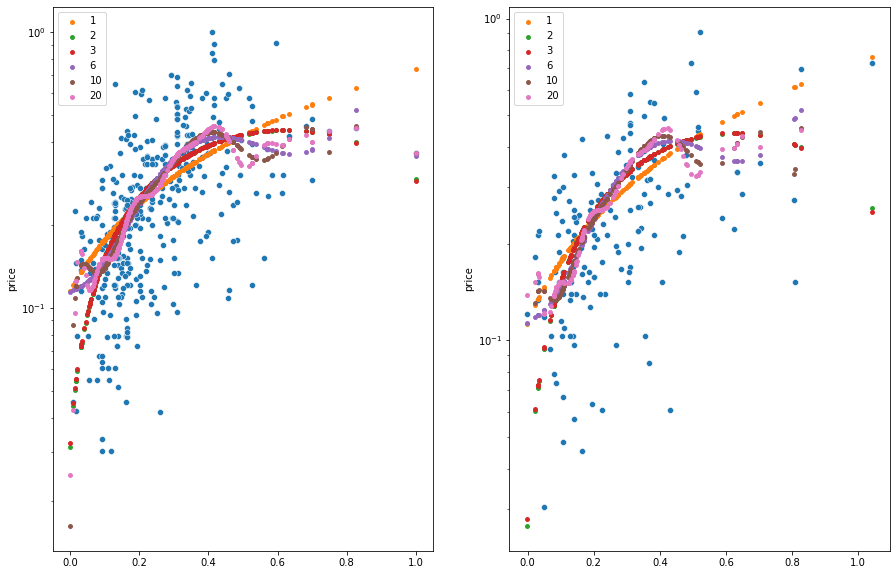

In [91]:
#train data

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.scatterplot(X_train.reshape(-1),y_train)
plt.yscale('log')
for i,degree in enumerate(degrees):
  plt.scatter(X_train,y_train_pred[:,i], s= 15,label = str(degree))
  plt.legend(loc='upper left')



#test data

plt.subplot(1,2,2)
sns.scatterplot(X_test.reshape(-1),y_test)
plt.yscale('log')
for i,degree in enumerate(degrees):
  plt.scatter(X_test,y_test_pred[:,i], s= 15,label = str(degree))
  plt.legend(loc='upper left')


plt.show()

In [92]:
for i, degree in enumerate(degrees):
  print("Polynomial degree {0}: Train R2 Score: {1}, Test R2 Score: {2}".format(degree,round(r2_score(y_train,y_train_pred[:,i]),2),round(r2_score(y_test,y_test_pred[:,i]),2)))

Polynomial degree 1: Train R2 Score: 0.29, Test R2 Score: 0.25
Polynomial degree 2: Train R2 Score: 0.34, Test R2 Score: 0.22
Polynomial degree 3: Train R2 Score: 0.34, Test R2 Score: 0.22
Polynomial degree 6: Train R2 Score: 0.36, Test R2 Score: 0.11
Polynomial degree 10: Train R2 Score: 0.37, Test R2 Score: -108.76
Polynomial degree 20: Train R2 Score: 0.38, Test R2 Score: -328827570133.84


In [93]:
#Cross Fold

In [94]:
# data preparation

# list of all the "yes-no" binary categorical variables
# we'll map yes to 1 and no to 0
binary_vars_list =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# applying the function to the housing variables list
Housing_df[binary_vars_list] = Housing_df[binary_vars_list].apply(binary_map)
Housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [95]:
# 'dummy' variables
# get dummy variables for 'furnishingstatus' 
# also, drop the first column of the resulting df (since n-1 dummy vars suffice)
status = pd.get_dummies(Housing_df['furnishingstatus'], drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [96]:
# concat the dummy variable df with the main df
Housing_df = pd.concat([Housing_df, status], axis = 1)
Housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [97]:
# 'furnishingstatus' since we alreday have the dummy vars
Housing_df.drop(['furnishingstatus'], axis = 1, inplace = True)
Housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Splitting Into Train and Test

In [98]:
# train-test 70-30 split
df_train, df_test = train_test_split(Housing_df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [99]:
# apply rescaling to the test set also
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [100]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [103]:
lm = LinearRegression()


Kfold = KFold(n_splits=5,shuffle=True,random_state=100)
score = cross_val_score(lm,X_train,y_train,scoring='r2',verbose=1,cv=Kfold)
score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.59930574, 0.71307628, 0.61325733, 0.62739077, 0.6212937 ])

In [105]:
Kfold = KFold(n_splits=5,shuffle=True,random_state=100)

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
hyper_params = [{'n_features_to_select': list(range(1,14))}]
grid_search = GridSearchCV(estimator=rfe,
                            param_grid = hyper_params,
                           scoring = 'r2',
                           return_train_score=True,
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    1.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [111]:
rfe_best = grid_search.best_estimator_
rfe_best

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=12, step=1, verbose=0)

In [115]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015565,0.000267,0.001696,0.000144,1,{'n_features_to_select': 1},0.332126,0.354583,0.313473,0.208356,0.193695,0.280447,0.066303,13,0.269598,0.266078,0.274238,0.293756,0.316843,0.284103,0.018961
1,0.014434,0.001785,0.001620,0.000098,2,{'n_features_to_select': 2},0.564088,0.476047,0.535103,0.409265,0.386452,0.474191,0.068860,12,0.456277,0.478146,0.466582,0.489266,0.514996,0.481054,0.020255
2,0.013408,0.001498,0.002668,0.001977,3,{'n_features_to_select': 3},0.547223,0.589021,0.601719,0.498255,0.464872,0.540218,0.052251,9,0.542008,0.533796,0.532540,0.551370,0.575501,0.547043,0.015746
3,0.013772,0.002376,0.001968,0.000410,4,{'n_features_to_select': 4},0.581111,0.547400,0.548076,0.468244,0.461748,0.521316,0.047617,11,0.559265,0.565411,0.583286,0.563045,0.584210,0.571043,0.010561
4,0.013327,0.001786,0.001785,0.000083,5,{'n_features_to_select': 5},0.591194,0.549705,0.572553,0.493925,0.470339,0.535543,0.046154,10,0.600268,0.569250,0.596139,0.602052,0.589408,0.591424,0.011909
5,0.011718,0.002827,0.001722,0.000092,6,{'n_features_to_select': 6},0.611143,0.535911,0.566240,0.583399,0.512358,0.561810,0.034744,8,0.605035,0.592223,0.639119,0.636415,0.632917,0.621142,0.018926
6,0.009469,0.000180,0.003790,0.004311,7,{'n_features_to_select': 7},0.660339,0.531479,0.588949,0.592931,0.533003,0.581340,0.047446,7,0.637852,0.599716,0.650758,0.638769,0.658031,0.637025,0.020127
7,0.008244,0.000107,0.001608,0.000063,8,{'n_features_to_select': 8},0.665153,0.582549,0.591880,0.605447,0.568750,0.602756,0.033417,6,0.639167,0.626099,0.653133,0.658033,0.683933,0.652073,0.019457
8,0.008534,0.002320,0.001812,0.000079,9,{'n_features_to_select': 9},0.692573,0.670759,0.630966,0.620179,0.585970,0.640089,0.037693,5,0.650771,0.654203,0.663114,0.666674,0.688326,0.664618,0.013182
9,0.006319,0.000224,0.001660,0.000127,10,{'n_features_to_select': 10},0.681441,0.667416,0.648982,0.624969,0.589166,0.642395,0.032653,4,0.662694,0.665251,0.669401,0.674336,0.698179,0.673972,0.012730


In [120]:
y_train_pred = rfe_best.predict(X_train)
y_test_pred = rfe_best.predict(X_test)

print('Train: ', r2_score(y_train,y_train_pred))
print('Test: ', r2_score(y_test,y_test_pred))

Train:  0.6814840385476646
Test:  0.6731013119788617


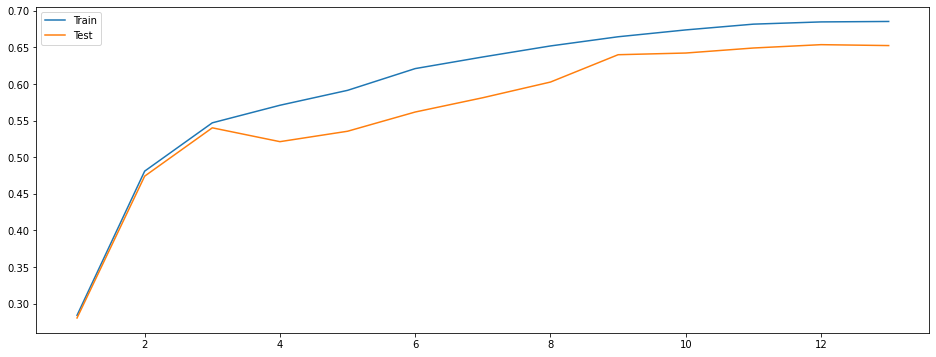

In [125]:
plt.figure(figsize=(16,6))

plt.plot(results['param_n_features_to_select'],results['mean_train_score'])
plt.plot(results['param_n_features_to_select'],results['mean_test_score'])

plt.legend(['Train','Test'],loc = 'upper left')
plt.show()

In [114]:
list(zip(X_train.columns,rfe_best.support_,rfe_best.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 2),
 ('unfurnished', True, 1)]

In [121]:
cols = X_train.columns[rfe_best.support_]
cols

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

In [122]:
lm=LinearRegression()
lm.fit(X_train[cols],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
y_train_pred = lm.predict(X_train[cols])
y_test_pred = lm.predict(X_test[cols])
print('Train: ', r2_score(y_train,y_train_pred))
print('Test: ', r2_score(y_test,y_test_pred))

Train:  0.6814840385476646
Test:  0.6731013119788617
